In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2585,ham,I will be outside office take all from there,NaN,NaN,NaN
3059,ham,K..k...from tomorrow onwards started ah?,NaN,NaN,NaN
3052,ham,Pls send me the correct name da.,NaN,NaN,NaN
2026,ham,"Nah man, my car is meant to be crammed full of...",NaN,NaN,NaN
2623,ham,I'm coming home 4 dinner.,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# 1: Data Cleaning
# 2: EDA
# 3: Text Preprocessing
# 4: Model building
# 5: Evaluation
# 6: Improvement
# 7: Website
# 8: Deploy

# 1. Data Cleaning

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1399,ham,You have registered Sinco as Payee. Log in at ...
5380,ham,Its sunny in california. The weather's just cool
3550,ham,I love you both too :-)
5245,ham,Thank you princess! I want to see your nice ju...
5214,spam,Natalja (25/F) is inviting you to be her frien...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

# 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

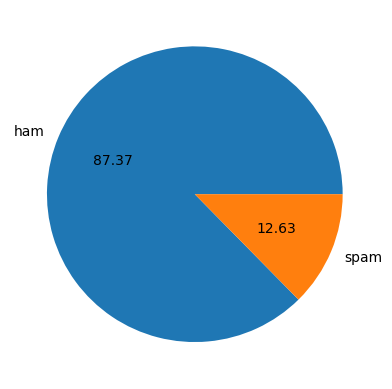

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [21]:
# Data is imbalanced


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
df['num_words']=df['text'].apply(lambda  x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentence
df['num_sentences']=df['text'].apply(lambda  x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [31]:
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

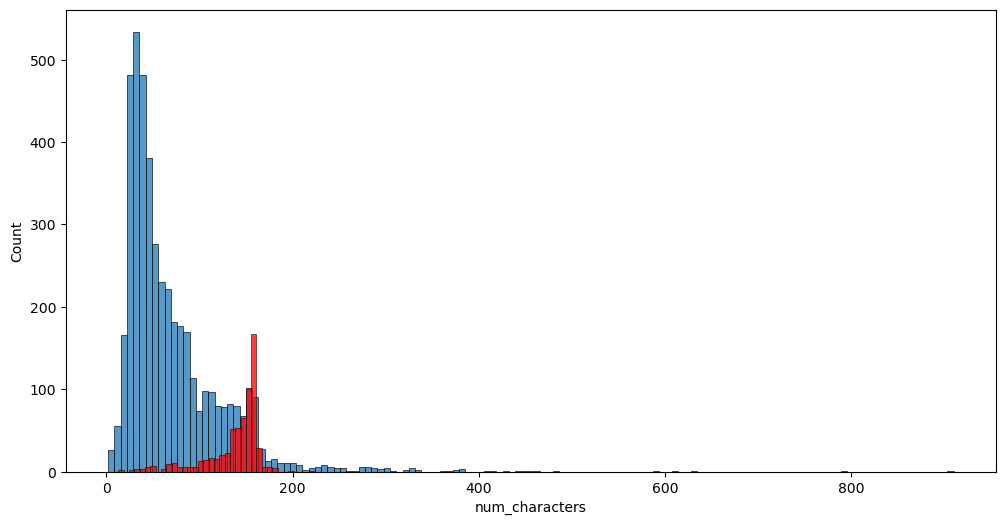

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

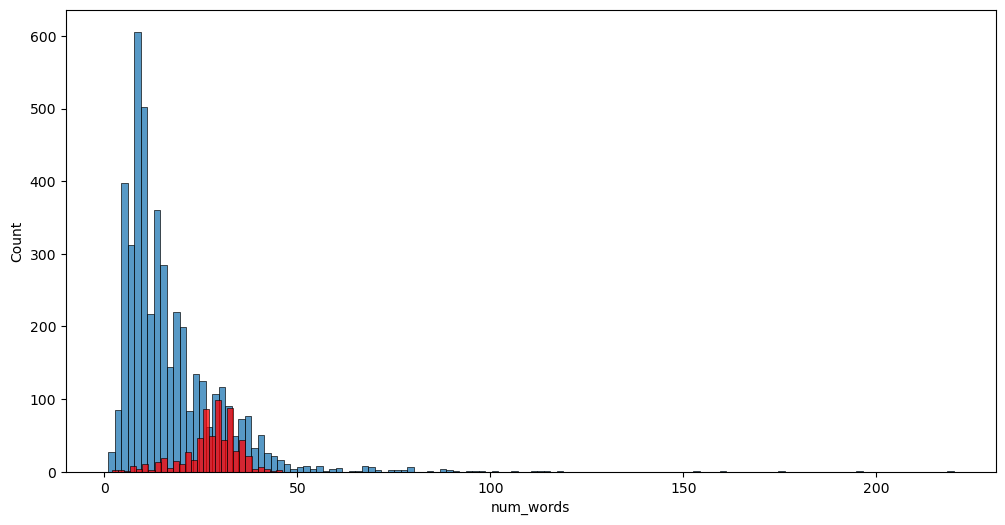

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

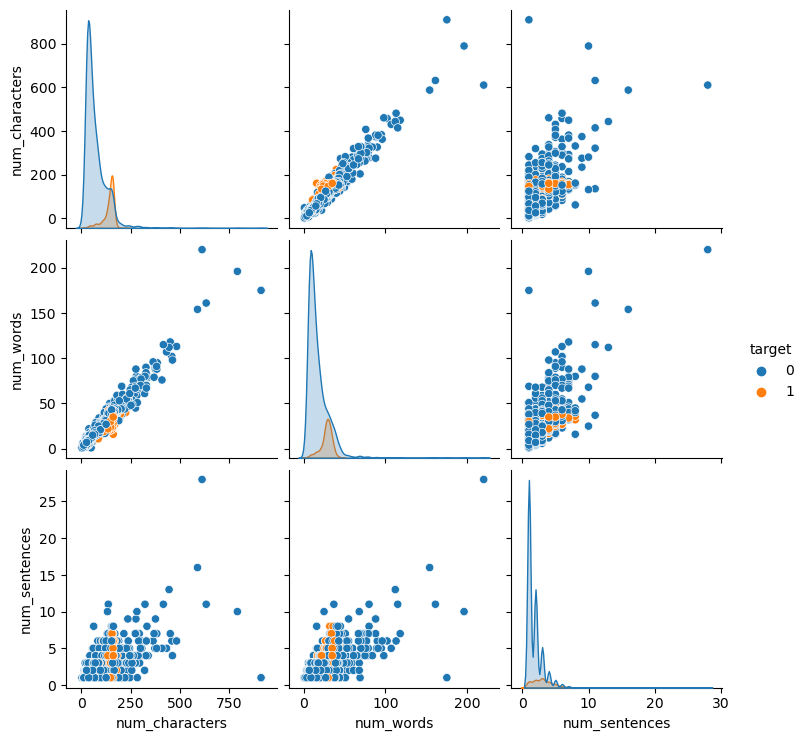

In [34]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

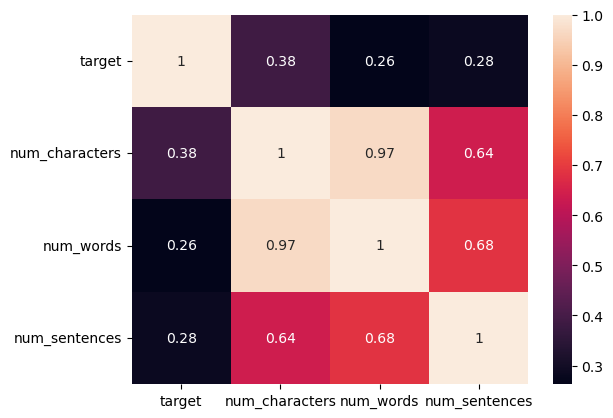

In [35]:
 sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
       . Lower case
        .Tokenization
         .Removing  special characters
         .Removing stop words and punctuation
         .Stemming
            

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[ : ]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return '  '.join(y)

In [41]:
transform_text(' hi how are  you %% eg loving')

'hi  eg  love'

In [42]:
df['transform_text']=df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep='   '))

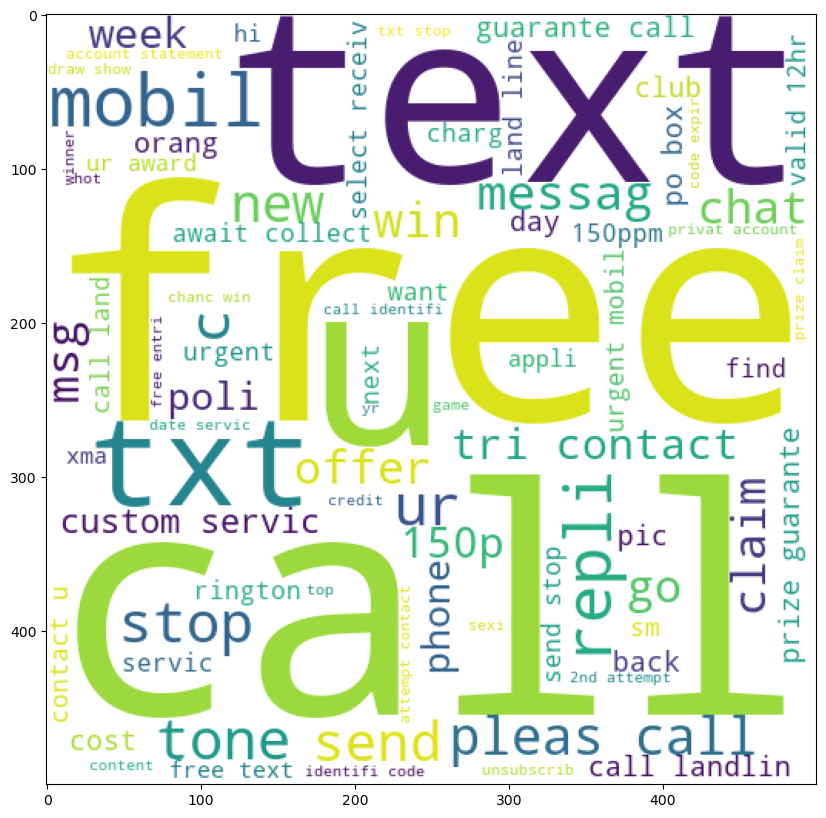

In [46]:
plt.figure(figsize=(13,10))
plt.imshow(spam_wc)

In [47]:
spam_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep='   '))

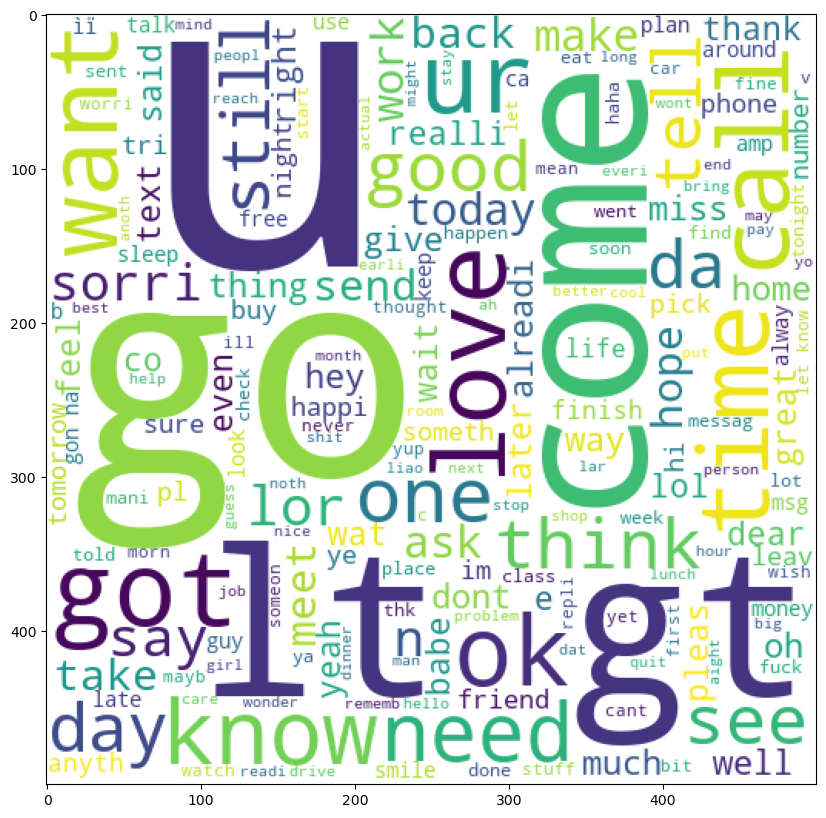

In [48]:
plt.figure(figsize=(13,10))
plt.imshow(spam_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [51]:
len(spam_corpus)

9939

C:\Users\farzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


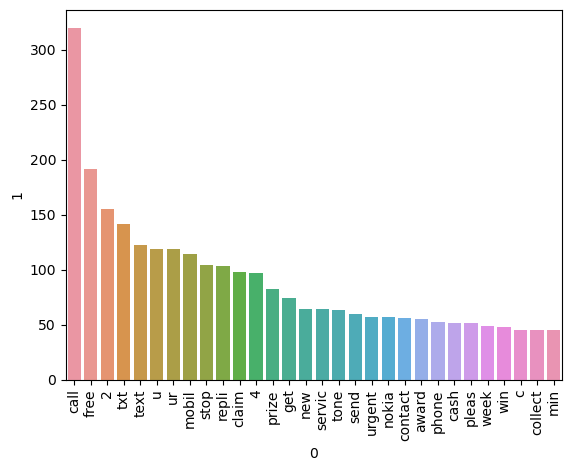

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35394

C:\Users\farzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


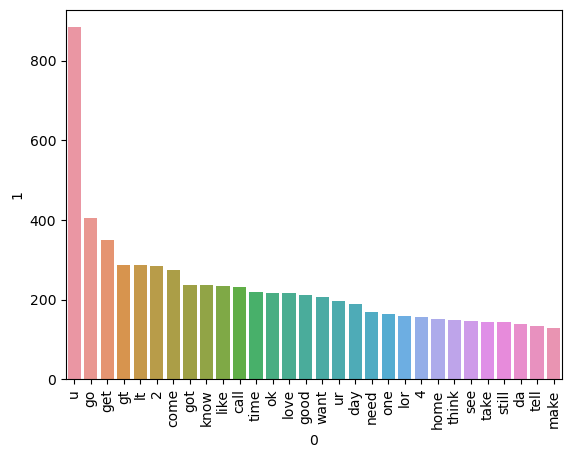

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [57]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [58]:
X.shape

(5169, 6708)

In [59]:
y=df['target'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [67]:
#tfidf-->MNB

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
pip install xgboost

In [70]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=20)

In [71]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precission=precision_score(y_test,y_pred)
    return accuracy,precission

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [74]:
#for name,clf in clfs.items():
   # train_classifier(clf,X_train,y_train,X_test,y_test)

In [76]:
accuracy_scores=[]
precision_scores=[]
for name ,clf in clfs.items():
    current_accuracy,current_precission=train_classifier(clf,X_train,y_train,X_test,y_test)
    print('for',name)
    print('Accuracy',current_accuracy)
    print('Precision',current_precission)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precission)
    

for SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828


C:\Users\farzad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


for KN
Accuracy 0.9003868471953579
Precision 1.0
for NB
Accuracy 0.9593810444874274
Precision 1.0
for DT
Accuracy 0.937137330754352
Precision 0.8543689320388349
for LR
Accuracy 0.9516441005802708
Precision 0.94
for RF
Accuracy 0.9738878143133463
Precision 1.0
for AdaBoost
Accuracy 0.9613152804642167
Precision 0.9454545454545454
for BgC
Accuracy 0.9584139264990329
Precision 0.8625954198473282
for ETC
Accuracy 0.9758220502901354
Precision 0.9829059829059829
for GBDT
Accuracy 0.9526112185686654
Precision 0.9238095238095239
for xgb
Accuracy 0.9690522243713733
Precision 0.9344262295081968


In [78]:
performance_df=pd.DataFrame({'Algoritm':clfs.keys(),'Accuracy':accuracy_scores,'Precission':precision_scores})

In [80]:
performance_df

,Algoritm,Accuracy,Precission
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.937137,0.854369
4,LR,0.951644,0.940000
5,RF,0.973888,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.975822,0.982906
9,GBDT,0.952611,0.923810


In [83]:
performance_df1=pd.melt(performance_df,id_vars='Algoritm')
performance_df1

,Algoritm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.937137
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.973888
6,AdaBoost,Accuracy,0.961315
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.975822
9,GBDT,Accuracy,0.952611


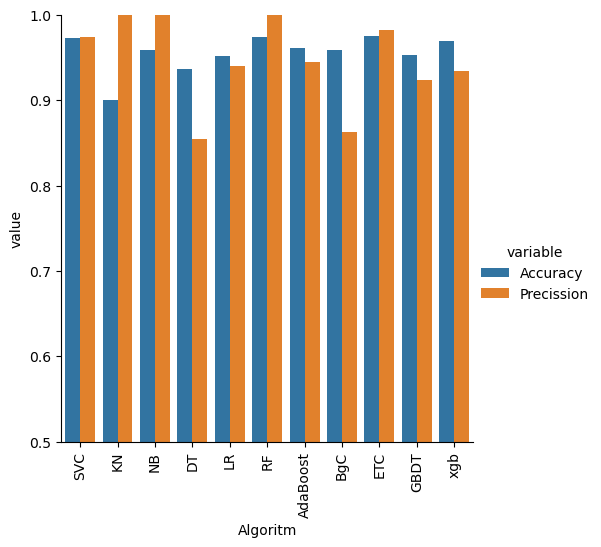

In [87]:
sns.catplot(x='Algoritm',y='value',
                           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()